<a href="https://colab.research.google.com/github/BrandaoEid/Machine-Learning-LARC-USP/blob/master/%C3%81rvore_de_decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de decisão

Pode se entender uma árvore de decisão como uma composição de regras if-then-else, devido a isso temos um modelo com maior interpretabilidade do que modelos como regressão linear/logística. Uma árvore de decisão segue a seguinte estrutura: 

<img src="https://dzone.com/storage/temp/8152817-b-tree.png" width="500" height = "400" align="center"/>

No topo da árvore temos o nó raiz que fica na profundidade 0, todos os nós que não contém repartição são considerados folhas (contém a classe final). É possível extrair informações do conjunto de dados olhando apenas esta estrutura final. 

Exemplo: Nesta árvore temos um conjunto de 150 amostras compostas por 3 atributos[X1,X2,X3], divididas em 3 classes com 50 amostras cada. A leitura da árvore seria da seguinte forma: Se o atributo X2 for menor ou igual que 2.45 a amostra pertence a classe 1, se não se o atributo X3 for menor que 1.75.. e assim sucessivamente até que as classes estejam separadas.


##Algoritmo

A partir da seguinte premissa:
1. Dado uma variável de target (Y) e um conjunto de X variáveis preditoras, onde temos x1,x2,x2...X
2. Para uma repartição R de registros, a repartição recursiva encontrará a melhor forma de repartir A em dois subconjuntos

O algoritmo de repartição funciona da seguinte forma:
1. Para cada variável Xn em X:
    
    1.1. Para cada valor V em Xn:

    1.1.1. Divida os valores presentes em Xn em dois subconjuntos, onde um deles contenha Xn <= V e o outro Xn > V

    1.1.2. Selecione o valor V em que a maior homogeneidade seja encontrada dentro da repartição

Algoritmo de repartição:
1. Dado o conjunto R de amostras(conjunto completo)
2. Aplique o algoritmo de repartição para gerar R1 e R2
3. Repita o passo 2 nos subconjuntos gerados até que não exista nenhuma outra repartição para ser feita que melhore a homogeneidade

A partir do algoritmo é possível notar a tendencia de sobreajustar os dados no treinamento, vez que, o passo de repartição se repete até que a homogeneidade seja máxima e para que isso aconteça as regras devem ser criadas levando em conta todo o dataset, que muitas vezes não está isento de ruídos.

##Homogeneidade

A homogeneidade falada no algoritmo nada mais é do que o quão bem separadas as classes estão dentro dos nós. Por exemplo a situação ideal seria que em cada nó folha ou até mesmo em um nó intermediário exista a predominancia de uma classes diante as outras. Esta situação pode ser vista no nó a esquerda logo após a raiz, onde existe somente uma classe presente e um índice de Gini = 0.

Devemos considerar a homogeneidade como o oposto de impureza (baixa homogeneidade, alta impureza e vice versa).A impureza é a medida utilizada em árvores de decisão e existem duas métricas para quantificar estes valores:
* Impureza de Gini

    I(A) = p * (1-p)


* Entropia

    I(A) = -p * log2(p) - (1-p) * log2(1-p)

    Onde p = (total de elementos de uma classe no nó/total de elementos no nó)

Gráficamente

<img src="https://d3i71xaburhd42.cloudfront.net/160e21c3acc925b60dc040cb1705e58bb166b045/3-Figure3-1.png" width="500" height = "300" align="center"/>

Podemos notar que a entropia penaliza de forma mais severa até as precisões  mais altas.

Para cada repartição é calculada a impureza nos subconjuntos e feita a média ponderada pela quantidade de registros, o atributo que possua a menor média ponderada para aquele passo é o selecionado.


##Ajustes
Com a finalizadade de evitar que a árvore sobreajuste aos dados de treinamentos, existem técnicas como:
* Evitar dividir uma repartição caso a subrepartição final for muito pequena ou a folha for muito pequena
* Não dividir uma repartição caso ocorra uma diminuição considerável no valor de homogeneidade
* Limitar a profundidade máxima da árvore

##Considerações
**Pontos Positivos**

Como positivos temos:
1. A possibilidade de inspecionar como cada relacionamento se da e também a importância de cada variável
2. Capacidade de encontrar relacionamentos não lineares entre as variáveis preditoras
3. Devido a alta interpretabilidade pessoas não especilistas podem utilizar para explicações
4. Não é necessário aplicar scalers aos dados, uma vez que cada atributo é processado separadamente

**Ponto Fraco**

Como ponto negativo:
1. Tendencia ao overfitting, necessários ajustar os hiperparametros para que isso não ocorra












##Exercício

Aplicação do algoritmo no dataset breast_cancer

Dados do dataset:

* 569 amostras de diagnósticos de câncer de mama
* Cada amostra possui 30 atributos
* Os labels da classe são 'benign' e 'malignant'
* Dataset presente no scikit-learn


In [0]:
import pandas as pd

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

Assinalar as preditoras e o target


In [0]:
X = cancer['data']
y = cancer['target']

Divisão entre treino e teste

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Modelo

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Desempenhos

In [24]:
print(tree.score(X_train,y_train))
print('{:.2f}'.format(tree.score(X_test,y_test)))

1.0
0.88


Como era esperado, a acurácia nos dados de treinamento deu 100%, o que mostra claramente a ocorrência overfitting. Podemos verificar a importancia de cada atributo dentro do modelo

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

def plot_feature_importances(model):
    n_features= X.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), nomes_atributo)
    plt.xlabel("Importancia dos atributos")
    plt.ylabel("Atributos")
    plt.ylim(-1, n_features)

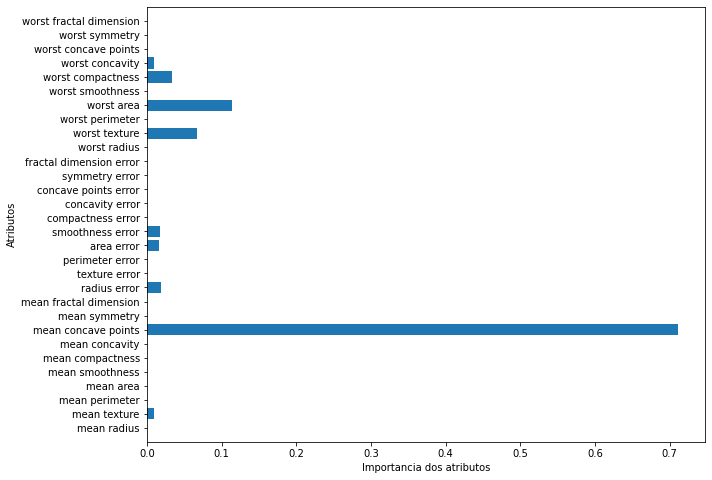

In [36]:
nomes_atributo= cancer['feature_names']
plot_feature_importances(tree)



Vamos construir um modelo agora aplicando a poda(limitando a profundidade) para verificar a diferença no desempenho e na escolha de atributos

In [27]:
tree4 = DecisionTreeClassifier(random_state=0, max_depth= 4)
tree4.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Desempenhos

In [28]:
print(tree4.score(X_train,y_train))
print('{:.2f}'.format(tree4.score(X_test,y_test)))

0.9929577464788732
0.90


Podemos ver como a poda auxilia na situação de sobreajuste e melhora o desempenho no treinamento. Podemos verificar a importancia de cada variável

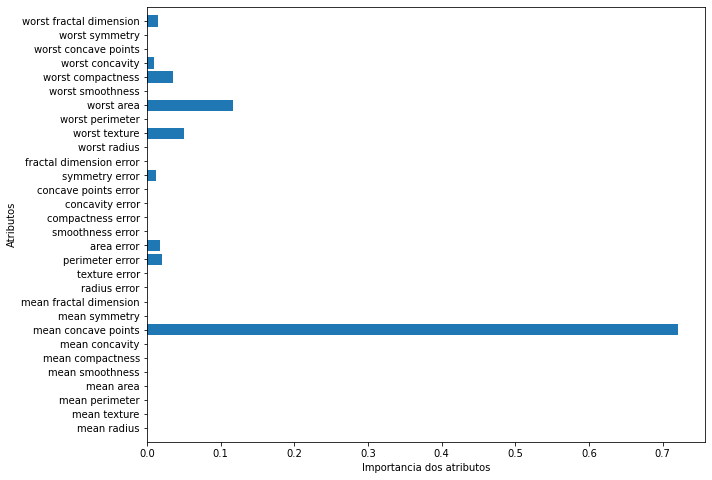

In [37]:
nomes_atributo= cancer['feature_names']
plot_feature_importances(tree4)

Podemos notar que para uma profundidade 4 temos o atributo "mean concave points" como mais importante ou mais influente no modelo e que alguns atributos antes desconsiderados agora estão considerados